In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector 

In [2]:
dfbus1=pd.read_csv("busdata/df_bus1.csv")
dfbus2=pd.read_csv("busdata/df_bus2.csv")
dfbus3=pd.read_csv("busdata/df_bus3.csv")
dfbus4=pd.read_csv("busdata/df_bus4.csv")
dfbus5=pd.read_csv("busdata/df_bus5.csv")
dfbus6=pd.read_csv("busdata/df_bus6.csv")
dfbus7=pd.read_csv("busdata/df_bus7.csv")
dfbus8=pd.read_csv("busdata/df_bus8.csv")
dfbus9=pd.read_csv("busdata/df_bus9.csv")
dfbus10=pd.read_csv("busdata/df_bus10.csv")
dfbus11=pd.read_csv("busdata/df_bus11.csv")

In [3]:
dfbus=pd.concat([dfbus1,dfbus2,dfbus3,dfbus4,dfbus5,dfbus6,dfbus7,dfbus8,dfbus9,dfbus10,dfbus11])

In [4]:
dfbus

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_name,Route_link
0,MMK Travels,VE A/C Seater / Sleeper (2+1),22:30,07:30,09h 00m,1100.0,4 Seats available,4.4\n489,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...
1,Kyros Connect,Bharat Benz A/C Semi Sleeper (2+2),23:00,09:00,10h 00m,1099.0,21 Seats available,4.1\n338,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...
2,Suraj Holidays,VE A/C Sleeper (2+1),22:30,07:30,09h 00m,1450.0,6 Seats available,3.9\n270,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...
3,AdFAST LINE BUS,A/C Sleeper (2+1),21:15,06:15,09h 00m,2699.0,34 Seats available,4.4\n7,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...
4,SURAJ TRAVEL HOUSE,VE A/C Seater / Sleeper (2+1),21:00,07:30,10h 30m,949.0,3 Seats available,4.0\n111,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...
...,...,...,...,...,...,...,...,...,...,...
92,SHYAMOLI Pvt. Ltd.(Karunamoyee),Volvo A/C Seater (2+2),17:30,22:30,05h 00m,524.0,33 Seats available,4.1\n134,Kolkata to Asansol (West Bengal),https://www.redbus.in/bus-tickets/kolkata-to-a...
93,Greenline,Volvo A/C Seater (2+2),18:05,23:05,05h 00m,524.0,37 Seats available,4.0\n32,Kolkata to Asansol (West Bengal),https://www.redbus.in/bus-tickets/kolkata-to-a...
94,Shyamoli Paribahan Pvt Ltd,Volvo A/C Seater (2+2),18:40,23:25,04h 45m,524.0,31 Seats available,4.2\n63,Kolkata to Asansol (West Bengal),https://www.redbus.in/bus-tickets/kolkata-to-a...
95,Royal Cruiser,Scania Multi-Axle AC Semi Sleeper (2+2),19:30,00:15,04h 45m,509.0,42 Seats available,3.6\n60,Kolkata to Asansol (West Bengal),https://www.redbus.in/bus-tickets/kolkata-to-a...


In [5]:
dfbus.shape

(2290, 10)

In [6]:
dfbus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2290 entries, 0 to 96
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bus_name         2290 non-null   object 
 1   Bus_type         2290 non-null   object 
 2   Start_time       2290 non-null   object 
 3   End_time         2290 non-null   object 
 4   Total_duration   2290 non-null   object 
 5   Price            2290 non-null   float64
 6   Seats_Available  2290 non-null   object 
 7   Ratings          2290 non-null   object 
 8   Route_name       2290 non-null   object 
 9   Route_link       2290 non-null   object 
dtypes: float64(1), object(9)
memory usage: 196.8+ KB


In [7]:
dfbus.describe()

,Price
count,2290.000000
mean,612.346122
std,449.579284
min,85.000000
25%,383.000000
50%,509.000000
75%,700.000000
max,5000.000000


In [8]:
dfbus.isna().sum()

Bus_name           0
Bus_type           0
Start_time         0
End_time           0
Total_duration     0
Price              0
Seats_Available    0
Ratings            0
Route_name         0
Route_link         0
dtype: int64

In [9]:
min(dfbus['Price'])

85.0

In [10]:
max(dfbus['Price'])

5000.0

 #### Converting the datatypes according  to our requirements

 ###### Start_time        -  object to time 
 ###### End_time          -  object to time
 ###### Seats_Available   - object to integer
 ###### Ratings           - object to float
###### Price              - float to decimal point


In [11]:
dfbus['Start_time']=pd.to_datetime(dfbus['Start_time'],format="%H:%M").dt.strftime("%H:%M")

In [12]:
dfbus['End_time']=pd.to_datetime(dfbus['End_time'],format="%H:%M").dt.strftime('%H:%M')

In [13]:
print(type(dfbus['End_time'][0]))

<class 'pandas.core.series.Series'>


In [14]:
print(type(dfbus['Start_time'][0]))

<class 'pandas.core.series.Series'>


In [15]:
dfbus['Start_time']

0     22:30
1     23:00
2     22:30
3     21:15
4     21:00
      ...  
92    17:30
93    18:05
94    18:40
95    19:30
96    18:30
Name: Start_time, Length: 2290, dtype: object

In [16]:
dfbus['End_time']

0     07:30
1     09:00
2     07:30
3     06:15
4     07:30
      ...  
92    22:30
93    23:05
94    23:25
95    00:15
96    00:30
Name: End_time, Length: 2290, dtype: object

In [17]:
## SEAT AVAILABILITY

dfbus['Seats_Available'].dtype

dtype('O')

In [18]:
dfbus['Seats_Available']

0      4 Seats available
1     21 Seats available
2      6 Seats available
3     34 Seats available
4      3 Seats available
             ...        
92    33 Seats available
93    37 Seats available
94    31 Seats available
95    42 Seats available
96    54 Seats available
Name: Seats_Available, Length: 2290, dtype: object

In [19]:
dfbus['Seats_Available']=dfbus['Seats_Available'].str.replace("Seat available","").str[0]

In [20]:
dfbus['Seats_Available']=dfbus['Seats_Available'].str.replace("Seats available","").str[0]

In [21]:
dfbus[dfbus['Seats_Available']==" "]

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_name,Route_link


In [22]:
len(dfbus[dfbus['Seats_Available']==0])

0

In [23]:
dfbus['Seats_Available']

0     4
1     2
2     6
3     3
4     3
     ..
92    3
93    3
94    3
95    4
96    5
Name: Seats_Available, Length: 2290, dtype: object

In [24]:
dfbus['Seats_Available']=dfbus['Seats_Available'].astype(int)

In [25]:
dfbus.head(2)

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_name,Route_link
0,MMK Travels,VE A/C Seater / Sleeper (2+1),22:30,07:30,09h 00m,1100.0,4,4.4\n489,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...
1,Kyros Connect,Bharat Benz A/C Semi Sleeper (2+2),23:00,09:00,10h 00m,1099.0,2,4.1\n338,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...


In [26]:
dfbus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2290 entries, 0 to 96
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bus_name         2290 non-null   object 
 1   Bus_type         2290 non-null   object 
 2   Start_time       2290 non-null   object 
 3   End_time         2290 non-null   object 
 4   Total_duration   2290 non-null   object 
 5   Price            2290 non-null   float64
 6   Seats_Available  2290 non-null   int64  
 7   Ratings          2290 non-null   object 
 8   Route_name       2290 non-null   object 
 9   Route_link       2290 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 261.3+ KB


In [27]:
## RATING

dfbus['Ratings'] 

0     4.4\n489
1     4.1\n338
2     3.9\n270
3       4.4\n7
4     4.0\n111
        ...   
92    4.1\n134
93     4.0\n32
94     4.2\n63
95     3.6\n60
96            
Name: Ratings, Length: 2290, dtype: object

In [28]:
dfbus['Ratings'] = dfbus['Ratings'].str.split('\n').str[0]
dfbus['Ratings'] = pd.to_numeric(dfbus['Ratings'], errors='coerce')

In [29]:
dfbus['Ratings']

0     4.4
1     4.1
2     3.9
3     4.4
4     4.0
     ... 
92    4.1
93    4.0
94    4.2
95    3.6
96    NaN
Name: Ratings, Length: 2290, dtype: float64

In [30]:
dfbus['Ratings'].dtype

dtype('float64')

In [31]:
## PRICE

dfbus['Price'].dtype

dtype('float64')

In [32]:
dfbus[dfbus['Price']==" "]

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_name,Route_link


In [33]:
dfbus['Price']=dfbus['Price'].astype(float).round(2)

In [34]:
dfbus['Price']

0     1100.0
1     1099.0
2     1450.0
3     2699.0
4      949.0
       ...  
92     524.0
93     524.0
94     524.0
95     509.0
96     500.0
Name: Price, Length: 2290, dtype: float64

## DATA CLEANING

Checking if there is any null or missing values


In [35]:
dfbus[dfbus['Total_duration']==" "]

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_name,Route_link


In [36]:
dfbus.isna().sum()

Bus_name            0
Bus_type            0
Start_time          0
End_time            0
Total_duration      0
Price               0
Seats_Available     0
Ratings            22
Route_name          0
Route_link          0
dtype: int64

<Figure size 1200x400 with 0 Axes>

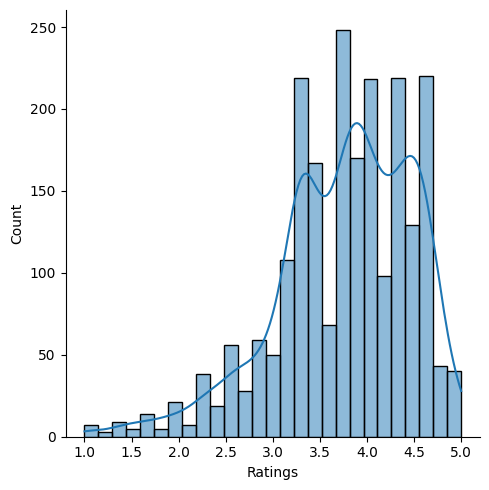

In [37]:
plt.figure(figsize=(12,4))
sns.displot(dfbus['Ratings'], kde = True)
plt.show()

In [38]:
dfbus['Ratings'] = dfbus['Ratings'].fillna(0.0)

In [39]:
dfbus.isna().sum()

Bus_name           0
Bus_type           0
Start_time         0
End_time           0
Total_duration     0
Price              0
Seats_Available    0
Ratings            0
Route_name         0
Route_link         0
dtype: int64

In [40]:
min(dfbus['Ratings'])

0.0

In [41]:
max(dfbus['Ratings'])

5.0

In [42]:
dfbus['Total_duration'] = dfbus['Total_duration'].str.replace('h', ':').str.replace('m', ':00').str.replace(' ', '')

In [43]:
dfbus.head(5)

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_name,Route_link
0,MMK Travels,VE A/C Seater / Sleeper (2+1),22:30,07:30,09:00:00,1100.0,4,4.4,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...
1,Kyros Connect,Bharat Benz A/C Semi Sleeper (2+2),23:00,09:00,10:00:00,1099.0,2,4.1,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...
2,Suraj Holidays,VE A/C Sleeper (2+1),22:30,07:30,09:00:00,1450.0,6,3.9,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...
3,AdFAST LINE BUS,A/C Sleeper (2+1),21:15,06:15,09:00:00,2699.0,3,4.4,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...
4,SURAJ TRAVEL HOUSE,VE A/C Seater / Sleeper (2+1),21:00,07:30,10:30:00,949.0,3,4.0,Bangalore to Kozhikode,https://www.redbus.in/bus-tickets/bangalore-to...


DATA is clean .. now we have to convert the dataframe to sql database for that first we need to connect to database

In [44]:
dfbus.to_csv("dfbus.csv",index=False)

In [45]:
dfbus.dtypes

Bus_name            object
Bus_type            object
Start_time          object
End_time            object
Total_duration      object
Price              float64
Seats_Available      int64
Ratings            float64
Route_name          object
Route_link          object
dtype: object

In [46]:
mydb=mysql.connector.connect(
            host="localhost",
            port=3306,
            user="root",
            password="Rameez22!",
            database="redbus",
)


cursor = mydb.cursor(buffered=True)

In [47]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS busdetail (
    id INT AUTO_INCREMENT PRIMARY KEY,
    busname VARCHAR(255),
    route_name VARCHAR(255),
    bustype VARCHAR(255),
    departing_time VARCHAR(255),
    duration VARCHAR(255),
    reaching_time VARCHAR(255),
    rating FLOAT,
    price DECIMAL(10, 2),
    seats_available INT,
    route_link VARCHAR(255)
);
""")

In [48]:
dfbus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2290 entries, 0 to 96
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bus_name         2290 non-null   object 
 1   Bus_type         2290 non-null   object 
 2   Start_time       2290 non-null   object 
 3   End_time         2290 non-null   object 
 4   Total_duration   2290 non-null   object 
 5   Price            2290 non-null   float64
 6   Seats_Available  2290 non-null   int64  
 7   Ratings          2290 non-null   float64
 8   Route_name       2290 non-null   object 
 9   Route_link       2290 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 261.3+ KB


In [49]:
sql_query = """
        INSERT INTO busdetail (
            busname, route_name, bustype, departing_time, duration, reaching_time,
            rating, price, seats_available,route_link
        ) VALUES (
            %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
        );
        """
        
        # Iterate over DataFrame rows
for index, row in dfbus.iterrows():
            
            # Execute the query with parameters
            cursor.execute(sql_query, (
                row['Bus_name'],
                row['Route_name'],
                row['Bus_type'],
                row['Start_time'],
                row['Total_duration'],
                row['End_time'],
                row['Ratings'],
                row['Price'],
                row['Seats_Available'],
                row['Route_link'],
))
mydb.commit()            

In [50]:
cursor.execute("SELECT * FROM busdetail")

out = cursor.fetchall()


In [51]:
from tabulate import tabulate

print(tabulate(out,headers=[i[0] for i in cursor.description]))

  id  busname                                                          route_name                                     bustype                                           departing_time    duration      reaching_time      rating    price    seats_available  route_link
----  ---------------------------------------------------------------  ---------------------------------------------  ------------------------------------------------  ----------------  ------------  ---------------  --------  -------  -----------------  -------------------------------------------------------------------------
   1  MMK Travels                                                      Bangalore to Kozhikode                         VE A/C Seater / Sleeper (2+1)                     22:30             09:00:00      07:30                 4.4  1100                     4  https://www.redbus.in/bus-tickets/bangalore-to-kozhikode
   2  Kyros Connect                                                    Bangalore to Kozhikode